If you are an absolute beginner, please check this.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are 31 columns in the dataset. Our task is to predict the column 'Class'.

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.shape

(284807, 31)

In [7]:
#check for missing values
data.isnull().sum().sum()

0

 There are no missing values in the dataset.

0    284315
1       492
Name: Class, dtype: int64


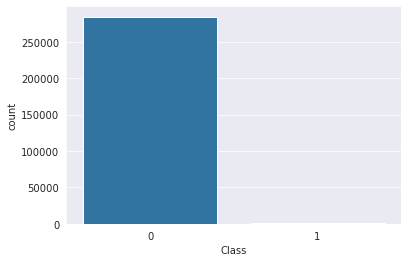

In [8]:
import seaborn as sns
print(data['Class'].value_counts())
sns.set_style("darkgrid")
sns.countplot(data['Class']);

This shows that our data is imbalanced. There are only few fraudulent transactions. So, accuracy is not the best option to compare the performace of the model. Other performance metrics are confusion matrix, precision, recall and F1 score. 

Precision =  Number of true positives/ number of true positives and false positives. A low value of precision means a large number of false positives.

Recall =  Number of true positives/ number of true positives and false negatives. A low value of recall indicates a large number of false negatives.

F1 score = 2*((precision x recall)/(precision+recall)). It is a measure of the balance between precision and recall.

In [4]:
fraud_data = data[data['Class']==1]
genuine_data = data[data['Class']==0]

In [10]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
genuine_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Plot distribution of Amount

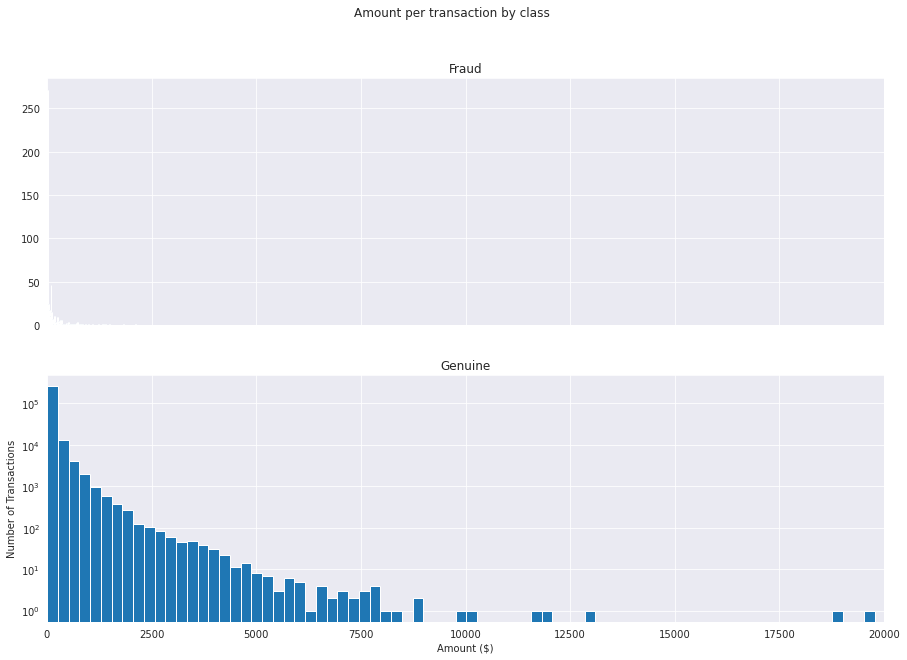

In [12]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))
f.suptitle('Amount per transaction by class')

ax1.hist(fraud_data.Amount, 100)
ax1.set_title('Fraud')
ax2.hist(genuine_data.Amount, 100)
ax2.set_title('Genuine')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

The amount column in the data is skewed.

In [6]:
#scaling the amount column using a standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data["Amount"]=scaler.fit_transform(np.array(data["Amount"]).reshape(-1,1))

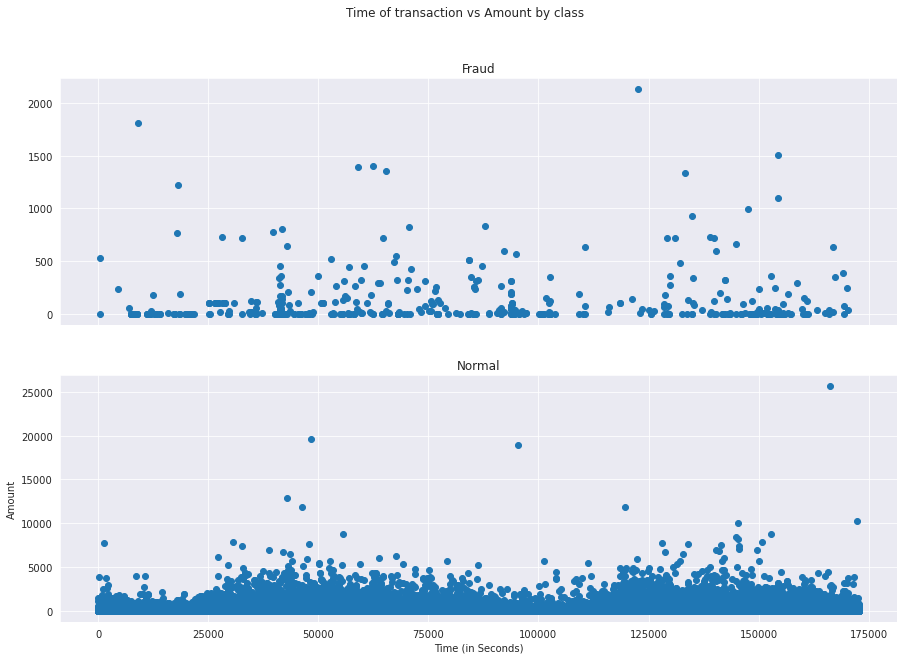

In [14]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_data.Time, fraud_data.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine_data.Time, genuine_data.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

We couldn't figure out any specific insights about the timing of fraudulent transaction. We have information regarding only 2 days. So, we can't make any conclusions regarding the time at which most fraudulent activiies occur.

**We should split the data before sampling**

In [7]:
#splitting data for training and testing
import sklearn
from sklearn.model_selection import train_test_split
x = data.drop("Class", axis=1)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 100)

In [8]:
#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_sample(x_train, y_train)
print(sorted(Counter(y_resampled).items()))

Using TensorFlow backend.


[(0, 227449), (1, 227449)]


# **TODO**    
Try various models- logistic regression, decision tree          
Performance evaluation using precision recall curve

# Trying Logistic Regression With SMOTE

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
clf=LogisticRegression(solver='saga')
clf.fit(x_resampled,y_resampled)
y_pred=clf.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy: 0.9961904427513079
F1 Score: 0.3022508038585209
Recall: 0.4895833333333333
Precision: 0.2186046511627907


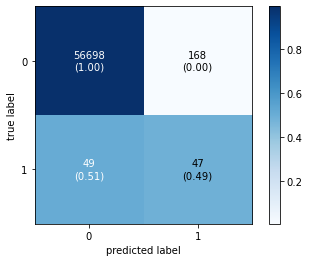

In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
#plot_confusion_matrix(clf, x_test, y_test) 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

We detected almost all the genuine cases. But the model performed too bad in detecting the fraudulent cases. Only very few fraudulent activities were detected. 

In [43]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(x_resampled,y_resampled)
y_pred=clf.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.9977528878901724
F1 Score: 0.5187969924812031
Recall: 0.71875
Precision: 0.40588235294117647


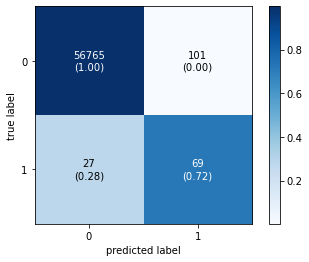

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
#plot_confusion_matrix(clf, x_test, y_test) 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Trying Random Forest with Sampling

In [19]:
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_resampled,y_resampled)
y_pred=clf.predict(x_test)

Accuracy: 0.9992977774656788
F1 Score: 0.7916666666666666
Recall: 0.7916666666666666
Precision: 0.7916666666666666


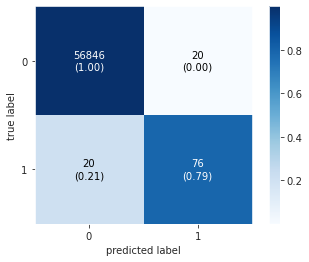

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Random forest with SMOTE works really well. 

Decision trees generally perform well on imbalanced data. Decion trees does not support missing values. Our dataset has no missing values.

Let us use Random Forest Classifier. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

# Trying Random Forest without sampling

In [23]:
# Separate input features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 80% training and 20% test

In [24]:
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

Performance Evaluation:
Use precision recall curve, and not ROC

Accuracy: 0.9996137776061234
F1 Score: 0.860759493670886
Recall: 0.7816091954022989
Precision: 0.9577464788732394


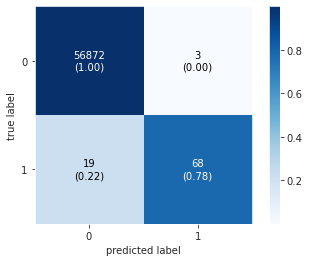

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Try Gradient Boosting without sampling

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
prediction = clf.predict(x_test)

Accuracy: 0.9996137776061234
F1 Score: 0.860759493670886
Recall: 0.7816091954022989
Precision: 0.9577464788732394


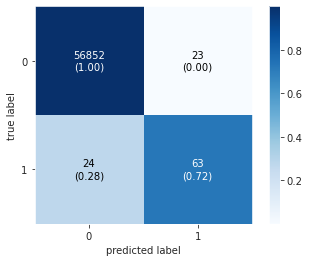

In [27]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
#plot_confusion_matrix(clf, x_test, y_test) 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

References
* https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
* https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
* https://www.datacamp.com/community/tutorials/random-forests-classifier-python